# Parth Thosani
Data Cleaning & Algorithms: KNN,SVM,Decision Tree and Logistic Regression

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

In [3]:
df = pd.read_csv("train_AV3.csv")
df.head(22)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [7]:
df["Gender"].fillna("Male", inplace=True)

In [8]:
df['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

In [9]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [10]:
df['Married'].fillna('Yes',inplace=True)

In [11]:
df['Married'].value_counts()

Yes    401
No     213
Name: Married, dtype: int64

In [12]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [13]:
df['Dependents'].fillna('0',inplace=True)

In [14]:
df['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [15]:
df["Self_Employed"].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [16]:
df['Self_Employed'].fillna('No',inplace=True)

In [17]:
df["Self_Employed"].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

In [18]:
df["LoanAmount"].fillna(df["LoanAmount"].mean(), inplace=True)

In [19]:
df["Loan_Amount_Term"].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [20]:
df['Loan_Amount_Term'].fillna(360.0,inplace=True)

In [21]:
df["Loan_Amount_Term"].value_counts()

360.0    526
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [22]:
df["Credit_History"].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [23]:
df['Credit_History'].fillna(1.0,inplace=True)

In [24]:
df["Credit_History"].value_counts()

1.0    525
0.0     89
Name: Credit_History, dtype: int64

In [25]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [26]:
lb_make = LabelEncoder()
df["Gender_n"] = lb_make.fit_transform(df["Gender"])
df["Married_n"] = lb_make.fit_transform(df["Married"])
df["Education_n"] = lb_make.fit_transform(df["Education"])
df["Dependents_n"] = lb_make.fit_transform(df["Dependents"])
df["Self_Employed_n"] = lb_make.fit_transform(df["Self_Employed"])
df["Property_Area_n"] = lb_make.fit_transform(df["Property_Area"])
df["Loan_Status_n"] = lb_make.fit_transform(df["Loan_Status"])

In [27]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_n,Married_n,Education_n,Dependents_n,Self_Employed_n,Property_Area_n,Loan_Status_n
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,1,0,0,0,0,2,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,1,1,0,1,0,0,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,1,1,0,0,1,2,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,1,1,1,0,0,2,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,1,0,0,0,0,2,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.000000,360.0,1.0,Urban,Y,1,1,0,2,1,2,1
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.000000,360.0,1.0,Urban,Y,1,1,1,0,0,2,1
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.000000,360.0,0.0,Semiurban,N,1,1,0,3,0,1,0
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.000000,360.0,1.0,Urban,Y,1,1,0,2,0,2,1
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.000000,360.0,1.0,Semiurban,N,1,1,0,1,0,1,0


In [28]:
X = df.drop(['Loan_Status_n','Loan_Status','Gender','Education','Self_Employed','Dependents','Married','Property_Area','Loan_ID'], axis=1)
y = df["Loan_Status_n"]
y

0      1
1      0
2      1
3      1
4      1
5      1
6      1
7      0
8      1
9      0
10     1
11     1
12     1
13     0
14     1
15     1
16     1
17     0
18     0
19     1
20     0
21     1
22     0
23     0
24     0
25     1
26     1
27     1
28     0
29     1
      ..
584    0
585    0
586    1
587    1
588    1
589    0
590    1
591    0
592    1
593    1
594    1
595    1
596    0
597    0
598    1
599    1
600    0
601    1
602    1
603    1
604    1
605    0
606    1
607    1
608    1
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status_n, Length: 614, dtype: int64

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

In [30]:
from sklearn.svm import SVC
model = SVC()

In [31]:
model.fit(X_train, y_train)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [32]:
svm_acc=model.score(X_test, y_test)

In [33]:
svm_acc

0.7398373983739838

In [34]:
df1 = df.drop(['Loan_Status','Gender','Education','Self_Employed','Dependents','Married','Property_Area','Loan_ID'],axis=1)

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
scaler = StandardScaler()

In [37]:
scaler.fit(df1.drop('Loan_Status_n',axis=1))

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [38]:
scaled_features = scaler.transform(df1.drop('Loan_Status_n',axis=1))
scaled_features

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


array([[ 0.07299082, -0.55448733,  0.        , ..., -0.73780632,
        -0.39260074,  1.22329839],
       [-0.13441195, -0.03873155, -0.21927331, ...,  0.25346957,
        -0.39260074, -1.31851281],
       [-0.39374734, -0.55448733, -0.957641  , ..., -0.73780632,
         2.54711697,  1.22329839],
       ...,
       [ 0.43717437, -0.47240418,  1.26937121, ...,  0.25346957,
        -0.39260074,  1.22329839],
       [ 0.35706382, -0.55448733,  0.4833669 , ...,  1.24474546,
        -0.39260074,  1.22329839],
       [-0.13441195, -0.55448733, -0.15972753, ..., -0.73780632,
         2.54711697, -0.04760721]])

In [39]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df1['Loan_Status_n'],
                                                    test_size=0.30)

In [40]:
accuracy_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,scaled_features,df1['Loan_Status_n'],cv=10)
    accuracy_rate.append(score.mean())

In [41]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,scaled_features,df['Loan_Status_n'],cv=10)
    error_rate.append(1-score.mean())

Text(0, 0.5, 'Error Rate')

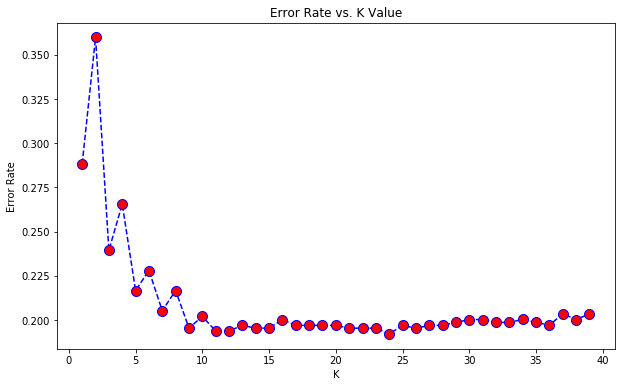

In [42]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
        markerfacecolor='red', markersize=10)
#plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
        # markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [43]:
knn = KNeighborsClassifier(n_neighbors=9)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=9')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')


WITH K=9


[[ 26  24]
 [  5 130]]




In [44]:
knn_acc=knn.score(X_test,y_test)

In [45]:
knn_acc

0.8432432432432433

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

In [47]:
from sklearn import tree
model = tree.DecisionTreeClassifier(criterion='entropy')

In [48]:
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [49]:
decision_acc=model.score(X_test,y_test)

In [50]:
decision_acc

0.7154471544715447

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

In [52]:
sc_x = StandardScaler() 
X_train = sc_x.fit_transform(X_train)  
X_test = sc_x.transform(X_test) 

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  app.launch_new_instance()


In [53]:
from sklearn.linear_model import LogisticRegression 
classifier = LogisticRegression(random_state = 0) 
classifier.fit(X_train, y_train) 


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [54]:
y_pred = classifier.predict(X_test) 


In [55]:
print(confusion_matrix(y_test,y_pred))

[[15 18]
 [ 2 88]]


In [56]:
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(y_test, y_pred)) 
logistic_acc= accuracy_score(y_test, y_pred)

Accuracy :  0.8373983739837398


In [57]:
knn_acc

0.8432432432432433

In [58]:
decision_acc

0.7154471544715447

In [59]:
logistic_acc

0.8373983739837398

In [60]:
svm_acc

0.7398373983739838

In [61]:
models = []
models.append(('LR', logistic_acc))
models.append(('KNN', knn_acc))
models.append(('CART', decision_acc))
models.append(('SVM', svm_acc))

In [62]:
models

[('LR', 0.8373983739837398),
 ('KNN', 0.8432432432432433),
 ('CART', 0.7154471544715447),
 ('SVM', 0.7398373983739838)]

In [63]:
results = []

In [64]:
results.append(logistic_acc)
results.append(knn_acc)
results.append(decision_acc)
results.append(svm_acc)

In [65]:
results

[0.8373983739837398,
 0.8432432432432433,
 0.7154471544715447,
 0.7398373983739838]

In [66]:
names = ['Logistic Regression','K Nearest Neighbour','Decision tree','Support Vector Machine']

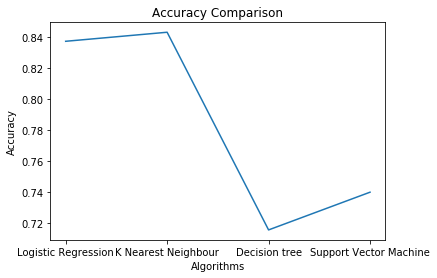

<Figure size 720x360 with 0 Axes>

In [67]:
import matplotlib.pyplot as plt
plt.plot(names, results)
plt.title('Accuracy Comparison')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.figure(
    figsize=(10, 5))
plt.show()